In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [3]:
df=pd.read_csv(r"C:\Users\Abhii\Music\Crop_Recommendataion\DATASET\Crop_recommendationV2.csv")
df

N   P   K  temperature   humidity        ph    rainfall   label  \
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice   
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice   
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice   
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice   
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice   
...   ...  ..  ..          ...        ...       ...         ...     ...   
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee   
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee   
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee   
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee   
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee   

      soil_moisture  soil_type  ...  organic_matter  irrigation_frequency  \
0         29.446064          2  ...        3.121395                     4   
1         12.851183          3  ...        2.142021                     4   
2         29.363913          2  ...        1.474974                     1   
3         26.207732          3  ...        8.393907                     1   
4         28.236236          2  ...        5.202285                     3   
...             ...        ...  ...             ...                   ...   
2195      10.697757          1  ...        4.720355                     5   
2196      12.203830          3  ...        4.141148                     6   
2197      28.989176          3  ...        1.599614                     5   
2198      13.642305          2  ...        8.934077                     6   
2199      23.911728          3  ...        6.401994                     3   

      crop_density  pest_pressure  fertilizer_usage  growth_stage  \
0        11.743910      57.607308        188.194958             1   
1        16.797101      74.736879         70.963629             1   
2        12.654395       1.034478        191.976077             1   
3        10.864360      24.091888         55.761388             3   
4        13.852910      38.811481        185.259702             2   
...            ...            ...               ...           ...   
2195     18.597260      87.431199        185.833381             3   
2196     15.417979      36.958354        198.541021             2   
2197     12.956675      79.678658         86.724381             2   
2198     16.868131      31.007156         72.191421             2   
2199     14.652123       3.574191        175.104241             3   

      urban_area_proximity  water_source_type  frost_risk  \
0                 2.719614                  3   95.649985   
1                 4.714427                  2   77.265694   
2                30.431736                  2   18.192168   
3                10.861071                  3   82.818720   
4                47.190777                  3   25.466499   
...                    ...                ...         ...   
2195             31.415618                  1   77.719639   
2196             18.797510                  3   22.336839   
2197             38.805888                  3   41.782729   
2198              8.395498                  3   49.619791   
2199             26.784996                  2   47.271267   

      water_usage_efficiency  
0                   1.193293  
1                   1.752672  
2                   3.035541  
3                   1.273341  
4                   2.578671  
...                      ...  
2195                4.111619  
2196                4.190796  
2197                2.447010  
2198                4.119388  
2199                2.758819  

[2200 rows x 23 columns]

In [4]:
df.columns = df.columns.str.strip()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   N                       2200 non-null   int64  
 1   P                       2200 non-null   int64  
 2   K                       2200 non-null   int64  
 3   temperature             2200 non-null   float64
 4   humidity                2200 non-null   float64
 5   ph                      2200 non-null   float64
 6   rainfall                2200 non-null   float64
 7   label                   2200 non-null   object 
 8   soil_moisture           2200 non-null   float64
 9   soil_type               2200 non-null   int64  
 10  sunlight_exposure       2200 non-null   float64
 11  wind_speed              2200 non-null   float64
 12  co2_concentration       2200 non-null   float64
 13  organic_matter          2200 non-null   float64
 14  irrigation_frequency    2200 non-null   

In [6]:
print(df.columns.tolist())

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label', 'soil_moisture', 'soil_type', 'sunlight_exposure', 'wind_speed', 'co2_concentration', 'organic_matter', 'irrigation_frequency', 'crop_density', 'pest_pressure', 'fertilizer_usage', 'growth_stage', 'urban_area_proximity', 'water_source_type', 'frost_risk', 'water_usage_efficiency']


In [7]:
# Drop unnecessary columns
columns_to_drop = ["wind_speed", "co2_concentration", "organic_matter", "pest_pressure",
                   "fertilizer_usage", "urban_area_proximity", "water_source_type", "water_usage_efficiency", 'growth_stage']

df = df.drop(columns=columns_to_drop)

In [8]:
df

N   P   K  temperature   humidity        ph    rainfall   label  \
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice   
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice   
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice   
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice   
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice   
...   ...  ..  ..          ...        ...       ...         ...     ...   
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee   
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee   
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee   
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee   
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee   

      soil_moisture  soil_type  sunlight_exposure  irrigation_frequency  \
0         29.446064          2           8.677355                     4   
1         12.851183          3           5.754288                     4   
2         29.363913          2           9.875230                     1   
3         26.207732          3           8.023685                     1   
4         28.236236          2           8.120512                     3   
...             ...        ...                ...                   ...   
2195      10.697757          1          10.330875                     5   
2196      12.203830          3           6.070558                     6   
2197      28.989176          3          11.097182                     5   
2198      13.642305          2           8.097337                     6   
2199      23.911728          3           8.639742                     3   

      crop_density  frost_risk  
0        11.743910   95.649985  
1        16.797101   77.265694  
2        12.654395   18.192168  
3        10.864360   82.818720  
4        13.852910   25.466499  
...            ...         ...  
2195     18.597260   77.719639  
2196     15.417979   22.336839  
2197     12.956675   41.782729  
2198     16.868131   49.619791  
2199     14.652123   47.271267  

[2200 rows x 14 columns]

In [9]:
df.describe(include="all")

N            P            K  temperature     humidity  \
count   2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean      50.551818    53.362727    48.149091    25.616244    71.481779   
std       36.917334    32.985883    50.647931     5.063749    22.263812   
min        0.000000     5.000000     5.000000     8.825675    14.258040   
25%       21.000000    28.000000    20.000000    22.769375    60.261953   
50%       37.000000    51.000000    32.000000    25.598693    80.473146   
75%       84.250000    68.000000    49.000000    28.561654    89.948771   
max      140.000000   145.000000   205.000000    43.675493    99.981876   

                 ph     rainfall label  soil_moisture    soil_type  \
count   2200.000000  2200.000000  2200    2200.000000  2200.000000   
unique          NaN          NaN    22            NaN          NaN   
top             NaN          NaN  rice            NaN          NaN   
freq            NaN          NaN   100            NaN          NaN   
mean       6.469480   103.463655   NaN      20.151388     1.991364   
std        0.773938    54.958389   NaN       5.793720     0.812263   
min        3.504752    20.211267   NaN      10.024260     1.000000   
25%        5.971693    64.551686   NaN      15.179949     1.000000   
50%        6.425045    94.867624   NaN      20.088481     2.000000   
75%        6.923643   124.267508   NaN      25.255146     3.000000   
max        9.935091   298.560117   NaN      29.997860     3.000000   

        sunlight_exposure  irrigation_frequency  crop_density   frost_risk  
count         2200.000000           2200.000000   2200.000000  2200.000000  
unique                NaN                   NaN           NaN          NaN  
top                   NaN                   NaN           NaN          NaN  
freq                  NaN                   NaN           NaN          NaN  
mean             8.570609              3.515000     12.344959    50.304701  
std              1.999382              1.697912      4.297494    28.580352  
min              5.000710              1.000000      5.004341     0.054911  
25%              6.904620              2.000000      8.585734    26.104674  
50%              8.609968              4.000000     12.303616    50.171934  
75%             10.220394              5.000000     15.975567    75.262676  
max             11.991041              6.000000     19.988474    99.957274

In [10]:
df.isnull().sum()

N                       0
P                       0
K                       0
temperature             0
humidity                0
ph                      0
rainfall                0
label                   0
soil_moisture           0
soil_type               0
sunlight_exposure       0
irrigation_frequency    0
crop_density            0
frost_risk              0
dtype: int64

In [11]:
df["label"].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [12]:
df.corr()

N         P         K  temperature  humidity  \
N                     1.000000 -0.231460 -0.140512     0.026504  0.190688   
P                    -0.231460  1.000000  0.736232    -0.127541 -0.118734   
K                    -0.140512  0.736232  1.000000    -0.160387  0.190859   
temperature           0.026504 -0.127541 -0.160387     1.000000  0.205320   
humidity              0.190688 -0.118734  0.190859     0.205320  1.000000   
ph                    0.096683 -0.138019 -0.169503    -0.017795 -0.008483   
rainfall              0.059020 -0.063839 -0.053461    -0.030084  0.094423   
soil_moisture        -0.030749  0.017027  0.008116    -0.009842  0.010933   
soil_type             0.021026 -0.000833  0.023587    -0.015571 -0.012640   
sunlight_exposure     0.005456  0.004664  0.004542     0.001200  0.035394   
irrigation_frequency -0.005733  0.012399  0.001386    -0.031864 -0.016798   
crop_density         -0.012270 -0.042635 -0.035940     0.026098 -0.032880   
frost_risk           -0.021273  0.030244  0.025110    -0.007591 -0.024591   

                            ph  rainfall  soil_moisture  soil_type  \
N                     0.096683  0.059020      -0.030749   0.021026   
P                    -0.138019 -0.063839       0.017027  -0.000833   
K                    -0.169503 -0.053461       0.008116   0.023587   
temperature          -0.017795 -0.030084      -0.009842  -0.015571   
humidity             -0.008483  0.094423       0.010933  -0.012640   
ph                    1.000000 -0.109069      -0.023978  -0.020061   
rainfall             -0.109069  1.000000      -0.048593   0.012959   
soil_moisture        -0.023978 -0.048593       1.000000   0.001269   
soil_type            -0.020061  0.012959       0.001269   1.000000   
sunlight_exposure    -0.008046  0.016778       0.006502  -0.006840   
irrigation_frequency  0.028987  0.002745      -0.044011   0.026638   
crop_density          0.002701 -0.005506       0.005281   0.029293   
frost_risk           -0.003499  0.004942       0.012678  -0.034281   

                      sunlight_exposure  irrigation_frequency  crop_density  \
N                              0.005456             -0.005733     -0.012270   
P                              0.004664              0.012399     -0.042635   
K                              0.004542              0.001386     -0.035940   
temperature                    0.001200             -0.031864      0.026098   
humidity                       0.035394             -0.016798     -0.032880   
ph                            -0.008046              0.028987      0.002701   
rainfall                       0.016778              0.002745     -0.005506   
soil_moisture                  0.006502             -0.044011      0.005281   
soil_type                     -0.006840              0.026638      0.029293   
sunlight_exposure              1.000000              0.004463      0.028616   
irrigation_frequency           0.004463              1.000000      0.025043   
crop_density                   0.028616              0.025043      1.000000   
frost_risk                    -0.012445             -0.015369     -0.018283   

                      frost_risk  
N                      -0.021273  
P                       0.030244  
K                       0.025110  
temperature            -0.007591  
humidity               -0.024591  
ph                     -0.003499  
rainfall                0.004942  
soil_moisture           0.012678  
soil_type              -0.034281  
sunlight_exposure      -0.012445  
irrigation_frequency   -0.015369  
crop_density           -0.018283  
frost_risk              1.000000

In [13]:
df["label"].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [14]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
le = LabelEncoder()

# List of columns that are of type 'object' (categorical features)
object_cols = df.select_dtypes(include=['object']).columns

# Convert all object-type columns to string (to handle mixed types)
for col in object_cols:
    df[col] = df[col].astype(str)  # Ensure all data in the column is treated as string

# Apply label encoding to each object-type column
for col in object_cols:
    df[col] = le.fit_transform(df[col])

# Check the result (first few rows)
print(df.head())

    N   P   K  temperature   humidity        ph    rainfall  label  \
0  90  42  43    20.879744  82.002744  6.502985  202.935536     20   
1  85  58  41    21.770462  80.319644  7.038096  226.655537     20   
2  60  55  44    23.004459  82.320763  7.840207  263.964248     20   
3  74  35  40    26.491096  80.158363  6.980401  242.864034     20   
4  78  42  42    20.130175  81.604873  7.628473  262.717340     20   

   soil_moisture  soil_type  sunlight_exposure  irrigation_frequency  \
0      29.446064          2           8.677355                     4   
1      12.851183          3           5.754288                     4   
2      29.363913          2           9.875230                     1   
3      26.207732          3           8.023685                     1   
4      28.236236          2           8.120512                     3   

   crop_density  frost_risk  
0     11.743910   95.649985  
1     16.797101   77.265694  
2     12.654395   18.192168  
3     10.864360   82.81872

In [15]:
df.corr()

N         P         K  temperature  humidity  \
N                     1.000000 -0.231460 -0.140512     0.026504  0.190688   
P                    -0.231460  1.000000  0.736232    -0.127541 -0.118734   
K                    -0.140512  0.736232  1.000000    -0.160387  0.190859   
temperature           0.026504 -0.127541 -0.160387     1.000000  0.205320   
humidity              0.190688 -0.118734  0.190859     0.205320  1.000000   
ph                    0.096683 -0.138019 -0.169503    -0.017795 -0.008483   
rainfall              0.059020 -0.063839 -0.053461    -0.030084  0.094423   
label                -0.031130 -0.491006 -0.346417     0.113606  0.193911   
soil_moisture        -0.030749  0.017027  0.008116    -0.009842  0.010933   
soil_type             0.021026 -0.000833  0.023587    -0.015571 -0.012640   
sunlight_exposure     0.005456  0.004664  0.004542     0.001200  0.035394   
irrigation_frequency -0.005733  0.012399  0.001386    -0.031864 -0.016798   
crop_density         -0.012270 -0.042635 -0.035940     0.026098 -0.032880   
frost_risk           -0.021273  0.030244  0.025110    -0.007591 -0.024591   

                            ph  rainfall     label  soil_moisture  soil_type  \
N                     0.096683  0.059020 -0.031130      -0.030749   0.021026   
P                    -0.138019 -0.063839 -0.491006       0.017027  -0.000833   
K                    -0.169503 -0.053461 -0.346417       0.008116   0.023587   
temperature          -0.017795 -0.030084  0.113606      -0.009842  -0.015571   
humidity             -0.008483  0.094423  0.193911       0.010933  -0.012640   
ph                    1.000000 -0.109069 -0.012253      -0.023978  -0.020061   
rainfall             -0.109069  1.000000  0.045611      -0.048593   0.012959   
label                -0.012253  0.045611  1.000000      -0.023052  -0.018042   
soil_moisture        -0.023978 -0.048593 -0.023052       1.000000   0.001269   
soil_type            -0.020061  0.012959 -0.018042       0.001269   1.000000   
sunlight_exposure    -0.008046  0.016778 -0.020551       0.006502  -0.006840   
irrigation_frequency  0.028987  0.002745 -0.018761      -0.044011   0.026638   
crop_density          0.002701 -0.005506 -0.023190       0.005281   0.029293   
frost_risk           -0.003499  0.004942 -0.030538       0.012678  -0.034281   

                      sunlight_exposure  irrigation_frequency  crop_density  \
N                              0.005456             -0.005733     -0.012270   
P                              0.004664              0.012399     -0.042635   
K                              0.004542              0.001386     -0.035940   
temperature                    0.001200             -0.031864      0.026098   
humidity                       0.035394             -0.016798     -0.032880   
ph                            -0.008046              0.028987      0.002701   
rainfall                       0.016778              0.002745     -0.005506   
label                         -0.020551             -0.018761     -0.023190   
soil_moisture                  0.006502             -0.044011      0.005281   
soil_type                     -0.006840              0.026638      0.029293   
sunlight_exposure              1.000000              0.004463      0.028616   
irrigation_frequency           0.004463              1.000000      0.025043   
crop_density                   0.028616              0.025043      1.000000   
frost_risk                    -0.012445             -0.015369     -0.018283   

                      frost_risk  
N                      -0.021273  
P                       0.030244  
K                       0.025110  
temperature            -0.007591  
humidity               -0.024591  
ph                     -0.003499  
rainfall                0.004942  
label                  -0.030538  
soil_moisture           0.012678  
soil_type              -0.034281  
sunlight_exposure      -0.012445  
irrigation_frequency   -0.015369  
crop_density           -0.01828

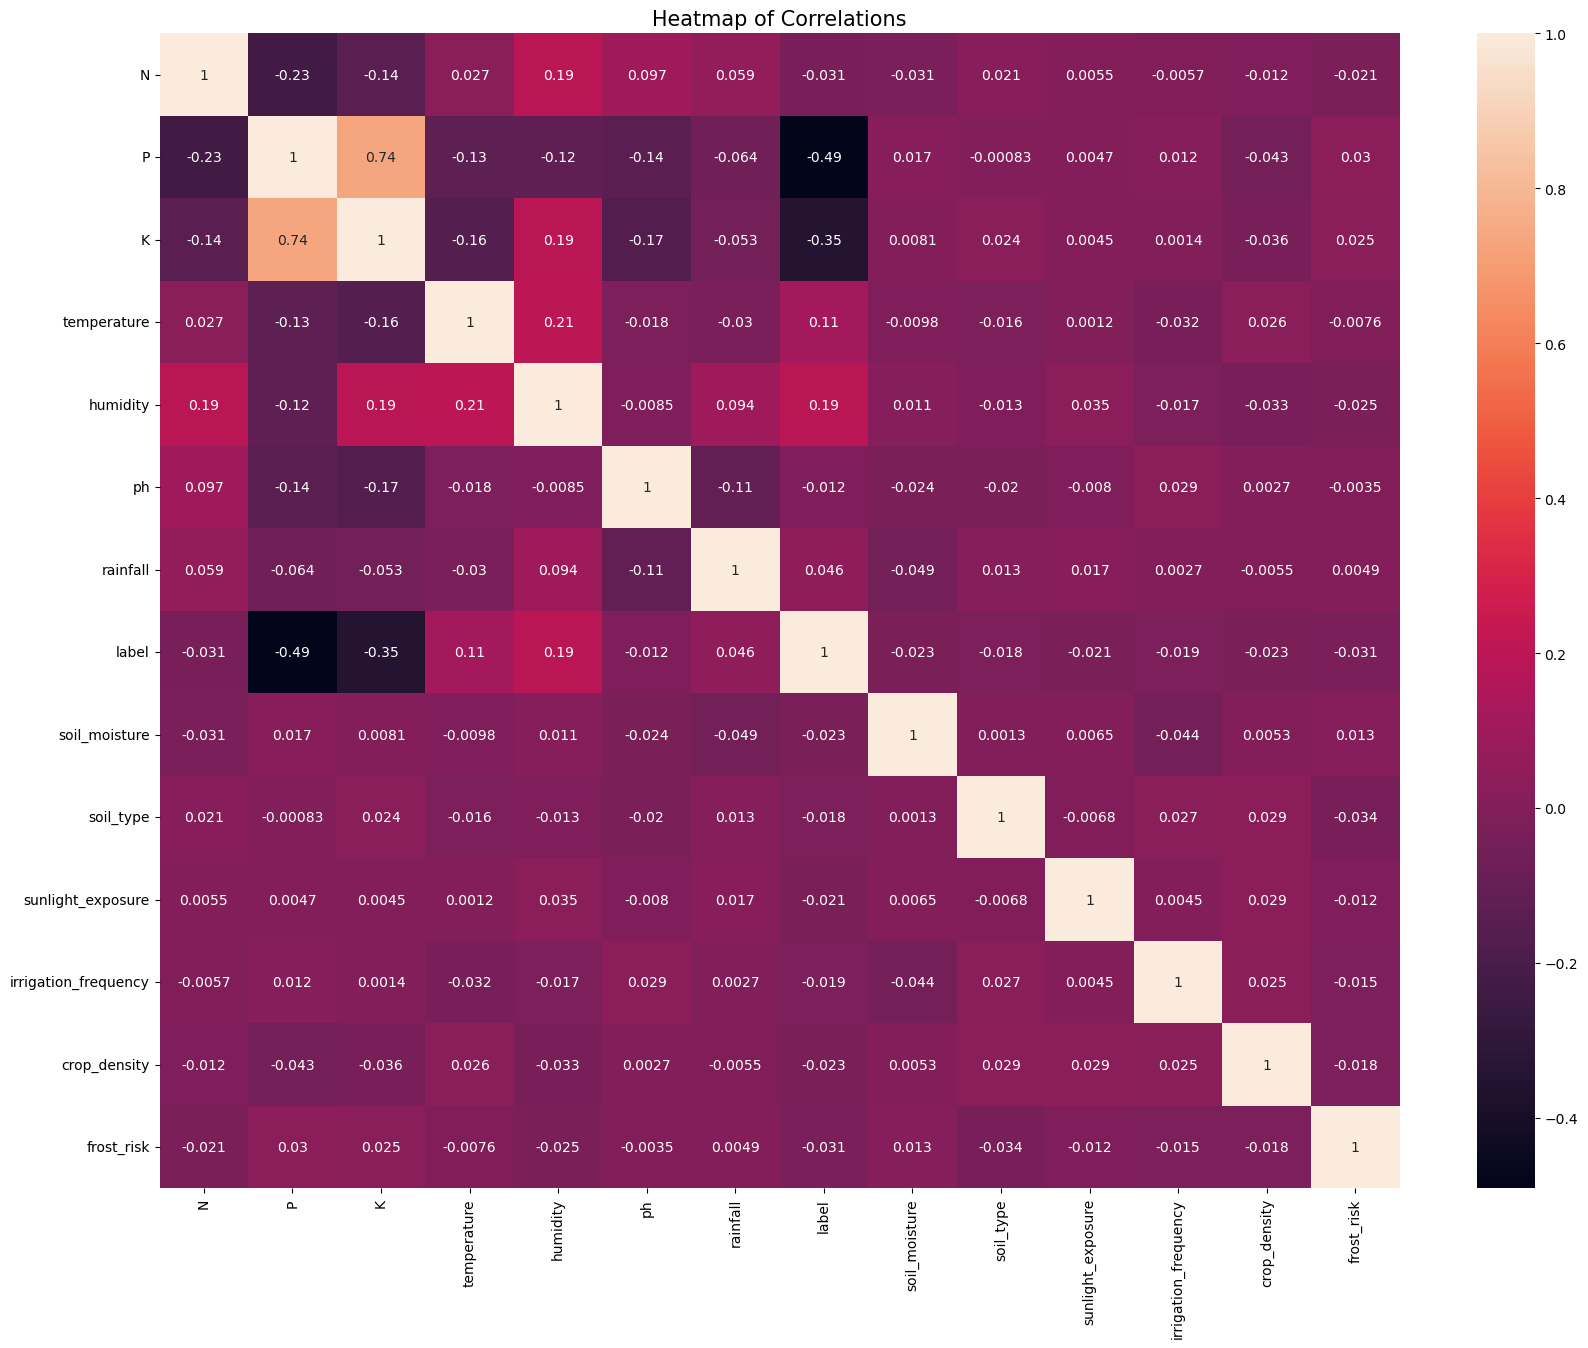

In [16]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)
plt.title('Heatmap of Correlations',fontsize=15)
plt.show()

In [17]:
print(df.columns.tolist())

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label', 'soil_moisture', 'soil_type', 'sunlight_exposure', 'irrigation_frequency', 'crop_density', 'frost_risk']


In [19]:
x = df.drop(columns=['label'])
y = df['label']

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=100)


In [21]:
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pickle

# Create a CatBoost Classifier model
cat_model = CatBoostClassifier(depth=5, iterations=100, random_seed=42, verbose=0)  # You can adjust depth and iterations as needed

# Train the CatBoost model
cat_model.fit(x_train, y_train)

# Saving the model
filename = r'C:\Users\Abhii\Music\Crop_Recommendataion\cat_model.pkl'
pickle.dump(cat_model, open(filename, 'wb'))

# Making predictions
pred_test = cat_model.predict(x_test)
test_accuracy = accuracy_score(y_test, pred_test)
pred_train = cat_model.predict(x_train)
train_accuracy = accuracy_score(y_train, pred_train)

# Printing accuracies
print("Accuracy on Test data is " + str(test_accuracy))
print("Accuracy on Train data is " + str(train_accuracy))

print("---------------------------") 

Accuracy on Test data is 0.9872727272727273
Accuracy on Train data is 1.0
---------------------------


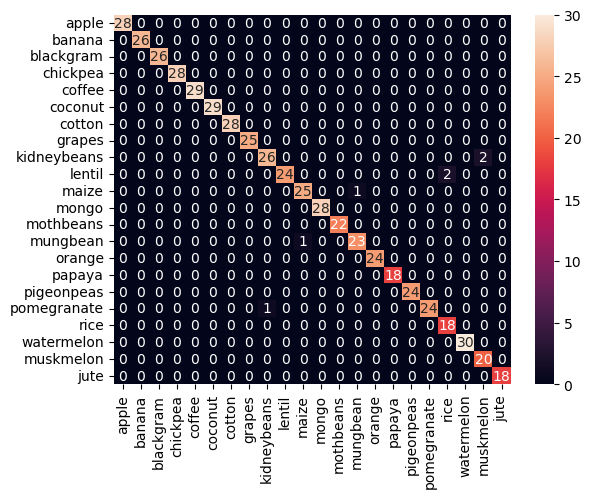

In [22]:
# Code for drawing seaborn heatmaps
class_names =['apple', 'banana', 'blackgram', 'chickpea', 'coffee', 'coconut', 'cotton', 'grapes', 'kidneybeans', 'lentil', 'maize', 'mongo', 'mothbeans', 'mungbean', 'orange', 'papaya', 'pigeonpeas', 'pomegranate', 'rice', 'watermelon', 'muskmelon', 'jute']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [23]:
from sklearn.metrics import confusion_matrix, classification_report
# Classification report
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        29
           5       1.00      1.00      1.00        29
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        25
           8       0.96      0.93      0.95        28
           9       1.00      0.92      0.96        26
          10       0.96      0.96      0.96        26
          11       1.00      1.00      1.00        28
          12       1.00      1.00      1.00        22
          13       0.96      0.96      0.96        24
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        18
          16       1.00      1.00      1.00        24
          17       1.00    

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score
import pickle

# Define the ANN model
ann_model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Change to softmax if multi-class classification
])

# Compile the model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
ann_model.fit(x_train, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(x_test, y_test))

# Save the model
filename = r'C:\Users\Abhii\Music\Crop_Recommendataion\ann_model.h5'
ann_model.save(filename)

# Making predictions
pred_train = (ann_model.predict(x_train) > 0.5).astype("int32")
pred_test = (ann_model.predict(x_test) > 0.5).astype("int32")

train_accuracy = accuracy_score(y_train, pred_train)
test_accuracy = accuracy_score(y_test, pred_test)

# Printing accuracies
print("Accuracy on Train data is " + str(train_accuracy))
print("Accuracy on Test data is " + str(test_accuracy))
print("---------------------------")


In [ ]:
import numpy 
print(numpy.__version__)


In [ ]:
!pip uninstall tensorflow
!pip install tensorflow

In [41]:
import tensorflow as tf

TypeError: 'numpy._DTypeMeta' object is not subscriptable

In [36]:
!pip install numpy==1.23.5

     ---------------------------------------- 14.7/14.7 MB 2.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 1.23.5 which is incompatible.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.23.5 which is incompatible.


In [34]:
!pip install tensorflow

     -------------------------------------- 375.7/375.7 MB 1.9 MB/s eta 0:00:00
     ---------------------------------------- 5.5/5.5 MB 1.8 MB/s eta 0:00:00
     -------------------------------------- 277.3/277.3 kB 2.8 MB/s eta 0:00:00
     ---------------------------------------- 15.9/15.9 MB 2.5 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB ? eta 0:00:00
     ---------------------------------------- 71.9/71.9 kB 3.9 MB/s eta 0:00:00
     -------------------------------------- 209.4/209.4 kB 6.4 MB/s eta 0:00:00
     ---------------------------------------- 4.3/4.3 MB 2.4 MB/s eta 0:00:00
     -------------------------------------- 434.6/434.6 kB 4.6 MB/s eta 0:00:00
     ---------------------------------------- 26.4/26.4 MB 1.7 MB/s eta 0:00:00
     ---------------------------------------- 3.0/3.0 MB 2.8 MB/s eta 0:00:00
     ---------------------------------------- 1.3/1.3 MB 2.6 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 M

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.2.2 requires pyqt5<5.13, which is not installed.
spyder 5.2.2 requires pyqtwebengine<5.13, which is not installed.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
scipy 1.9.1 requires numpy<1.25.0,>=1.18.5, but you have numpy 2.0.2 which is incompatible.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 2.0.2 which is incompatible.
catboost 1.2.7 requires numpy<2.0,>=1.16.0, but you have numpy 2.0.2 which is incompatible.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [1]:
from sklearn.ensemble import RandomForestClassifier

dept = [1, 5, 10, 50, 100, 500, 1000]
n_estimators =  [20, 40, 60, 80, 100, 120]

param_grid={'n_estimators':n_estimators , 'max_depth':dept}
clf = RandomForestClassifier()
model = GridSearchCV(clf,param_grid,scoring='accuracy',n_jobs=-1,cv=5)
model.fit(x_train,y_train)
print("optimal n_estimators",model.best_estimator_.n_estimators)
print("optimal max_depth",model.best_estimator_.max_depth)
optimal_max_depth = model.best_estimator_.max_depth
optimal_n_estimators = model.best_estimator_.n_estimators

NameError: name 'GridSearchCV' is not defined

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Training the Random Forest classifier
clf = RandomForestClassifier(max_depth=optimal_max_depth, n_estimators=optimal_n_estimators)
clf.fit(x_train, y_train)

# Predictions on train and test sets
train_pred = clf.predict(x_train)
test_pred = clf.predict(x_test)

# Accuracy scores
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

print("Accuracy on Train data is " + str(train_accuracy))
print("Accuracy on Test data is " + str(test_accuracy))
print("---------------------------")

# Training and test accuracy curves
train_accuracies = []
test_accuracies = []
estimators_range = range(1, optimal_n_estimators + 1)  # Adjust range if necessary

for n_estimators in estimators_range:
    clf = RandomForestClassifier(max_depth=optimal_max_depth, n_estimators=n_estimators)
    clf.fit(x_train, y_train)

    train_pred = clf.predict(x_train)
    test_pred = clf.predict(x_test)

    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plotting the training and test accuracy curves
plt.figure(figsize=(10, 6))
plt.plot(estimators_range, train_accuracies, label='Train')
plt.plot(estimators_range, test_accuracies, label='Test')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Random Forest Training and Test Accuracy')
plt.legend()
plt.show()

NameError: name 'optimal_max_depth' is not defined

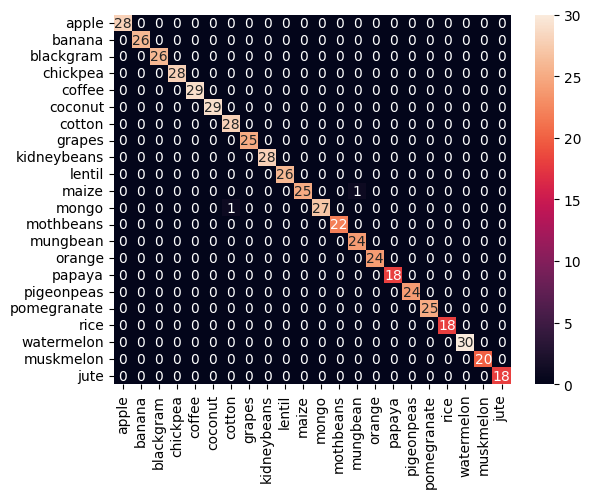

In [38]:
# Code for drawing seaborn heatmaps
class_names =['apple', 'banana', 'blackgram', 'chickpea', 'coffee', 'coconut', 'cotton', 'grapes', 'kidneybeans', 'lentil', 'maize', 'mongo', 'mothbeans', 'mungbean', 'orange', 'papaya', 'pigeonpeas', 'pomegranate', 'rice', 'watermelon', 'muskmelon', 'jute']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, test_pred.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [39]:
from sklearn.metrics import confusion_matrix, classification_report
# Classification report
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        29
           5       1.00      1.00      1.00        29
           6       0.97      1.00      0.98        28
           7       1.00      1.00      1.00        25
           8       1.00      1.00      1.00        28
           9       1.00      1.00      1.00        26
          10       1.00      0.96      0.98        26
          11       1.00      0.96      0.98        28
          12       1.00      1.00      1.00        22
          13       0.96      1.00      0.98        24
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        18
          16       1.00      1.00      1.00        24
          17       1.00    

In [43]:
import pickle
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create an XGBoost Classifier model
xgb_model = XGBClassifier(max_depth=5, n_estimators=100, random_state=42)  # You can adjust max_depth and n_estimators as needed

xgb_model.fit(x_train, y_train)

# Saving the model
filename = r'/content/drive/MyDrive/xgboost_model.pkl'
pickle.dump(xgb_model, open(filename, 'wb'))

# Making predictions
pred_test = xgb_model.predict(x_test)
test_accuracy = accuracy_score(y_test, pred_test)
pred_train = xgb_model.predict(x_train)
train_accuracy = accuracy_score(y_train, pred_train)

# Printing accuracies
print("Accuracy on Test data is " + str(test_accuracy))
print("Accuracy on Train data is " + str(train_accuracy))

print("---------------------------")

Accuracy on Test data is 0.990909090909091
Accuracy on Train data is 1.0
---------------------------


In [45]:
# Code for drawing seaborn heatmaps
class_names =['apple', 'banana', 'blackgram', 'chickpea', 'coffee', 'coconut', 'cotton', 'grapes', 'kidneybeans', 'lentil', 'maize', 'mongo', 'mothbeans', 'mungbean', 'orange', 'papaya', 'pigeonpeas', 'pomegranate', 'rice', 'watermelon', 'muskmelon', 'jute']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [46]:
from sklearn.metrics import confusion_matrix, classification_report
# Classification report
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        26
           2       0.96      1.00      0.98        26
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        29
           5       1.00      1.00      1.00        29
           6       0.97      1.00      0.98        28
           7       1.00      1.00      1.00        25
           8       1.00      0.96      0.98        28
           9       1.00      1.00      1.00        26
          10       0.96      0.96      0.96        26
          11       1.00      0.96      0.98        28
          12       1.00      1.00      1.00        22
          13       0.96      0.96      0.96        24
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        18
          16       1.00      1.00      1.00        24
          17       1.00    

In [47]:
!pip install lightgbm

In [48]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(boosting_type='goss')
lgbm.fit(x_train,y_train)
# Saving the model
filename = r'/content/drive/MyDrive/LGBM_model.pkl'
pickle.dump(lgbm, open(filename, 'wb'))

# Making predictions
pred_test = lgbm.predict(x_test)
test_accuracy = accuracy_score(y_test, pred_test)
pred_train = lgbm.predict(x_train)
train_accuracy = accuracy_score(y_train, pred_train)

# Printing accuracies
print("Accuracy on Test data is " + str(test_accuracy))
print("Accuracy on Train data is " + str(train_accuracy))

print("---------------------------")


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001152 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4158
[LightGBM] [Info] Number of data points in the train set: 1650, number of used features: 22
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] Start training from score -3.131864
[LightGBM] [Info] Start training from score -3.104465
[LightGBM] [Info] Start training from score -3.104465
[LightGBM] [Info] Start trainin

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
Accuracy on Test data is 0.990909090909091
Accuracy on Train data is 1.0
---------------------------


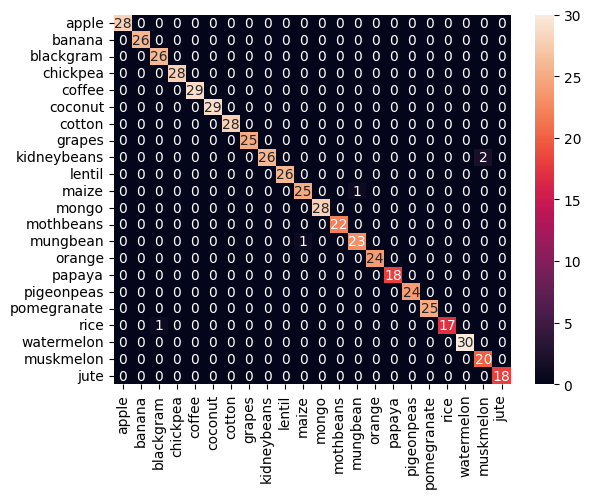

In [49]:
# Code for drawing seaborn heatmaps
class_names =['apple', 'banana', 'blackgram', 'chickpea', 'coffee', 'coconut', 'cotton', 'grapes', 'kidneybeans', 'lentil', 'maize', 'mongo', 'mothbeans', 'mungbean', 'orange', 'papaya', 'pigeonpeas', 'pomegranate', 'rice', 'watermelon', 'muskmelon', 'jute']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [50]:
from sklearn.metrics import confusion_matrix, classification_report
# Classification report
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        26
           2       0.96      1.00      0.98        26
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        29
           5       1.00      1.00      1.00        29
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        25
           8       1.00      0.93      0.96        28
           9       1.00      1.00      1.00        26
          10       0.96      0.96      0.96        26
          11       1.00      1.00      1.00        28
          12       1.00      1.00      1.00        22
          13       0.96      0.96      0.96        24
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        18
          16       1.00      1.00      1.00        24
          17       1.00    